# Computer Vision - Autumn 2021 - Home Assignment 2

**Ondřej Schejbal & Jan Vladár**

We were assigned to deal with image detection and segmentation with the aim try different approaches in detection of selected sea plants.

For our project we decided to work with these 2 plant species:
* <a href="https://en.wikipedia.org/wiki/Zostera">Zostera</a>
* <a href="https://en.wikipedia.org/wiki/Zostera">Mytilus</a>

In [2]:
import os
from PIL import Image
import cv2
# import numpy as np
import matplotlib.pyplot as plt

class1FolderName = './Mytilus_original'
class2FolderName = './Zostera_original'

In [3]:
# make the output images larger
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 300

In [4]:
def getFolderNameAndEtalonFolderName(classFolderName, print_it=False):
    folderName = classFolderName[:-9]
    etalonFolderName = folderName + 'Etalons'
    if print_it:
        print('Folder name:', folderName, '\r\nEtalon folder name:', etalonFolderName)
    return folderName, etalonFolderName

## Task 1
*Collect a set of images suitable for the tasks below of at least 3 species. Write code to preprocess the 
images of plants into a uniform size of your choice, e.g. 1024x1024 pixels.*

We have searched for relevant Zostera and Mytilus images on the web, but most of the pictures contained either watermark, or some additional text. Because of that we were left with only limited number of images for our task. This can have significant effect especially on the deep neural network solution described in [part 4](#part_4) and that's why we decided to use data agmentation for that part of our assignment.

In the code below we are transforming the images into recommended dimensions 1024x1024 and also converting them to the same format.

In [5]:
def transformImagesInDirectoryToInitialState(folderName):
    list_of_files = os.listdir(folderName)
    targetFolderName = folderName[:-9]
    for idx, file in enumerate(list_of_files):
        image_file_name = os.path.join(folderName, file)
        img = Image.open(image_file_name)  # .convert("L")
        img = img.resize((1024, 1024))
        if not os.path.exists(targetFolderName):
            os.mkdir(targetFolderName)
        img.save(targetFolderName + '/' + str(idx) + ".png")
        # os.remove(image_file_name)

In [6]:
def task1():
    transformImagesInDirectoryToInitialState(class1FolderName)
    transformImagesInDirectoryToInitialState(class2FolderName)
# task1()

## Task 2
*Select a set of etalons (e.g. small images containing a sample of some distinctive features) from the 
an image to be used for matching similar objects. Aim for a set that would be representative on at 
least 50% of the images of the particular species. Think how to deal with rotations.*

In this task we have manually created 9 etalons for each selected sea plant. We have always tried to select as small etalon as possible, which still contains one representative of given plant.

For Mytilus this was quite simple, but for Zostera it was not. Zostera is basically a sea grass and selecting only one grass stalk was sometimes very difficult. We have also decided to make Zostera etalons always from different part of the grass stalk - from the top, middle of the stalk and bottom.

When selecting the etalons our goal was to have a selection of small pieces from our images, which would have representative characteristic of respective plant species.

The goal was then to try match our etalons to the whole image sets and observe the results.

**TODO popsat, co jsme pouzili**

**Resolution**: We were able to achieve xx % of accuracy for Zostera and yy % accuracy for Mytilus.

We have also experimented with etalons. We observed that modifying the size significantly affects the accuracy. When the etalons were much bigger, the accuracy became significantly lower.

In [7]:
def match_image(img, template):
    # methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED,
    #     cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] 
    # result_list = []
    w, h = template.shape[::-1]
    match_method = cv2.TM_CCOEFF_NORMED
    res = cv2.matchTemplate(img, template, match_method)
    minval, maxval, minloc, maxloc = cv2.minMaxLoc(res)
    topleft = maxloc
    btm_right = (topleft[0] + w, topleft[1] + h)
    cv2.rectangle(img, topleft, btm_right, 255, 2)
    return maxval

In [8]:
def congo(etalons, images, my_input, my):
    for et in os.listdir(etalons):
        e_img = etalons + "/" + et
        print("e_img", e_img)
        img_teplate = cv2.imread(e_img, 0) 
        my_input = []
        for image in os.listdir(images):
            f_img = images + "/" + image
            print("f_img", f_img)
            img = cv2.imread(f_img, 0)
            result = match_image(img, img_teplate)
            my_input.append(result)
        my.append(my_input)
    averages = []
    for i in my :
        avg = 0
        for o in i:
            avg = avg + o
        averages.append(avg/(len(my[0])))
    print("Precision:", sum(averages)/len(averages))
    return averages

In [14]:
def task2(classFolderName):
    my_input = []
    my = []
    folderName, etalonFolderName = getFolderNameAndEtalonFolderName(classFolderName)
    print(etalonFolderName, folderName)
    pele = congo(etalonFolderName, folderName, my_input, my)
    # print("pele", pele)

# print("Mytilus")
# task2(class1FolderName)

print("Zostera")
task2(class2FolderName)

Zostera
./ZosteraEtalons ./Zostera
e_img ./ZosteraEtalons/1.png
f_img ./Zostera/1536099532815861833.jpg
f_img ./Zostera/Eelgrass-e1531080374998.jpg
f_img ./Zostera/fullsizeoutput_3148-300x201.jpeg
f_img ./Zostera/IMG_4720.png
f_img ./Zostera/IMG_4721.jpg
f_img ./Zostera/picture-22.png
f_img ./Zostera/Sand_Seegras_big.jpg
f_img ./Zostera/Snimka_obrazovky_2021-11-10_o_20.10.12.png
f_img ./Zostera/Snimka_obrazovky_2021-11-10_o_20.12.17.png
f_img ./Zostera/Snimka_obrazovky_2021-11-10_o_20.12.32.png
f_img ./Zostera/Snímka obrazovky 2021-11-12 o 20.27.06.png


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:588: error: (-215:Assertion failed) corr.rows <= img.rows + templ.rows - 1 && corr.cols <= img.cols + templ.cols - 1 in function 'cv::crossCorr'


## Task 3
Use at least 3 different existing conventional feature detectors provided by 
OpenCV to find matches of the etalons in the image. NB! Take into account overlaps and subtract the 
appropriate numbers from total scores.

Evaluate on two different images (called task3a.tiff and task3b.tiff) how well the approach works and 
which feature detector performs best.

### Feature detection in an image
#### todo resolve final version of task 3

In [6]:
# todo remove and clean later
folderName, etalonFolderName = getFolderNameAndEtalonFolderName(class1FolderName)


Folder name: ./Mytilus 
Etalon folder name: ./MytilusEtalons


In [5]:
img = cv2.imread(folderName + "/0.png", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()  # cv2.SIFT_create()
# surf = cv2.SURF_create()  # cv2.xfeatures2d.SURF_create()
# orb = cv2.ORB_create(nfeatures=1500)  # cv2.ORB_create(nfeatures=1500)

In [6]:
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
# keypoints_surf, descriptors = surf.detectAndCompute(img, None)
# keypoints_orb, descriptors = orb.detectAndCompute(img, None)

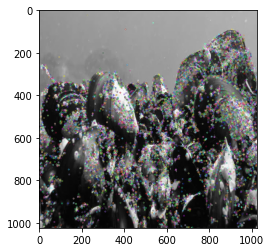

In [7]:
imgWithKeypoints = cv2.drawKeypoints(img, keypoints_sift, None)

plt.figure()
plt.imshow(imgWithKeypoints, cmap="gray")
# cv2.imshow("Image With Keypoints", imgWithKeypoints)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Feature matching

In [8]:
img1 = img
img2 = cv2.imread(etalonFolderName + '/0.png', cv2.IMREAD_GRAYSCALE)

#### BruteForce

In [9]:
# ORB Detector
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [10]:
# Brute Force Matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

In [11]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

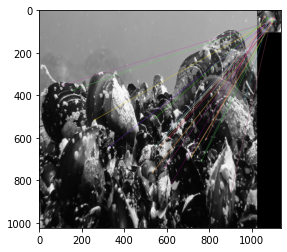

In [12]:
plt.figure()
plt.imshow(matching_result, cmap="gray")

#### SIFT

In [17]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [18]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

In [29]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

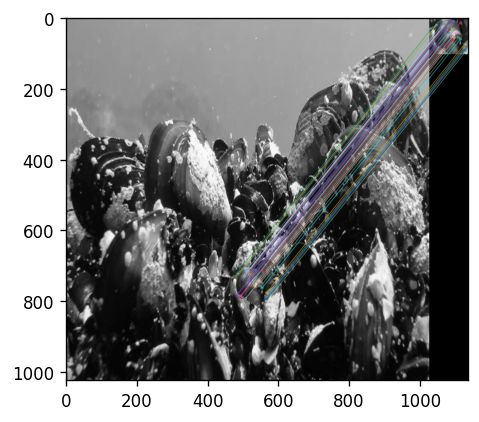

In [30]:
plt.figure()
plt.imshow(matching_result, cmap="gray")

#### SURF

In [1]:
# surf = cv2.xfeatures2d.SURF_create() # 400 ?
# kp1, des1 = surf.detectAndCompute(img1, None)
# kp2, des2 = surf.detectAndCompute(img2, None)

# bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# matches = bf.match(des1, des2)
# matches = sorted(matches, key = lambda x:x.distance)

# matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# plt.figure()
# plt.imshow(matching_result, cmap="gray")

## Task 4<a id='part_4'></a>
*Improve the baseline by applying deep learning.*

**TODO REMOVE THE REST**


Key words: OpenCV 4, OpenVINO, ONNX, 
Tensorflow, PyTorch. The result needs to be documented, i.e. you should present quantitative results 
in a report where you show if and how much the deep learning approach improved your baseline. 

Make sure to use appropriate criteria for the measurement!

NB! Aim at using a pretrained network as a basis and apply the concept of transfer learning to adjust 
the net for your task.

NB! The work needs to be documented, i.e. you need to include a report where you have 
quantitative results of your baseline and improvement in addition to the description of the approach 
taken.

To store images in the Git repository you should use Git LFS support.
You may use the AI-Lab environment for GPU accelerated computations.*


**Helpful hints:**

Labling tool: CVAT